In [2]:
from itertools import combinations
from itertools import combinations_with_replacement 
from itertools import permutations 
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D


import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [4]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'PC1'], y=reduced_data.loc[:, 'PC2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

In [4]:
# sample example -- Principal Component Analysis
# Generally this is called a data reduction technique.

we will use make_blobs to generate 100 x 10 matrix data, such that 3 are 100 samples with 10 observations. 

These 100 samples were generated from four different clusters. 

Since it is simulated, we know which cluster each sample belong to.

In [7]:
X1, Y1 = make_blobs(n_features=10, 
                    n_samples=1000,
                    centers=4, 
                    random_state=45,
                    cluster_std=2)

print(X1.shape)
print(Y1.shape)

(1000, 10)
(1000,)


In [6]:
Y1

array([3, 3, 1, 3, 1, 1, 2, 2, 1, 0, 3, 2, 0, 3, 3, 2, 3, 0, 2, 3, 1, 2,
       1, 2, 1, 2, 0, 3, 3, 2, 0, 1, 3, 0, 1, 3, 2, 0, 2, 3, 3, 0, 0, 0,
       3, 3, 1, 0, 3, 2, 0, 1, 0, 3, 1, 2, 3, 3, 0, 1, 1, 0, 1, 1, 1, 3,
       3, 2, 0, 2, 0, 3, 1, 3, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 3, 3, 0, 2,
       2, 2, 2, 3, 2, 3, 0, 0, 0, 3, 1, 2, 2, 0, 3, 3, 0, 3, 1, 3, 2, 3,
       0, 1, 3, 0, 3, 0, 0, 1, 2, 0, 3, 3, 1, 3, 3, 0, 3, 1, 0, 3, 1, 0,
       3, 0, 1, 2, 2, 2, 1, 2, 2, 2, 3, 0, 0, 1, 3, 1, 1, 0, 3, 2, 3, 3,
       2, 2, 0, 3, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 3, 2, 2, 3, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 3, 3, 0, 1,
       0, 0, 3, 1, 2, 0, 1, 2, 3, 3, 1, 3, 1, 0, 0, 0, 1, 3, 2, 2, 0, 3,
       3, 0, 3, 3, 2, 0, 0, 3, 1, 2, 2, 2, 0, 3, 0, 1, 2, 2, 2, 0, 1, 1,
       3, 3, 1, 0, 1, 0, 3, 2, 0, 0, 2, 2, 0, 3, 3, 0, 0, 0, 0, 2, 2, 1,
       2, 3, 0, 1, 3, 2, 2, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 1, 3, 1, 2,
       3, 2, 0, 3, 0, 0, 3, 1, 0, 0, 1, 0, 0, 3, 1,

Here, X1 is the 100 x 10 data and Y1 is cluster assignment for the 100 samples. 

Let us create a PCA model with 4 components from sklearn.decomposition.

### Plot the raw scatter plots

In [8]:
# dataframe for the raw data

raw_df = pd.DataFrame(data = X1 , 
                      columns = ['col1', 'col2','col3','col4',
                                 'col5', 'col6','col7','col8',
                                 'col9', 'col10' ])

raw_df['Cluster'] = Y1

print(raw_df.head())
print(raw_df.shape)

       col1       col2       col3      col4      col5      col6       col7  \
0  2.306476  -9.478803   3.818234 -0.584806  6.215237 -4.112664  -2.080288   
1  4.042252  -7.395106  -1.687208 -0.793636  7.763321 -7.141733  -0.238228   
2  8.760766   3.204665   8.160478  2.211301  0.827963 -2.996465   4.186663   
3  3.136206 -13.435450   3.912300 -3.395047  4.106386 -4.169009  -3.339006   
4  6.039237   5.406857  10.313843  1.194532  1.184670 -3.159781  10.455179   

       col8      col9      col10  Cluster  
0  3.654887 -5.874751  -8.936565        3  
1  0.176930 -5.620866  -6.963814        3  
2  4.861807 -1.578241  -5.926660        1  
3  1.836336 -4.041802 -10.058150        3  
4  2.770896 -4.116441  -1.437312        1  
(1000, 11)


In [8]:
# for col_c in list(combinations(raw_df.drop(['Cluster'], axis=1).columns, 2)):
#     print(col_c[0], col_c[1])

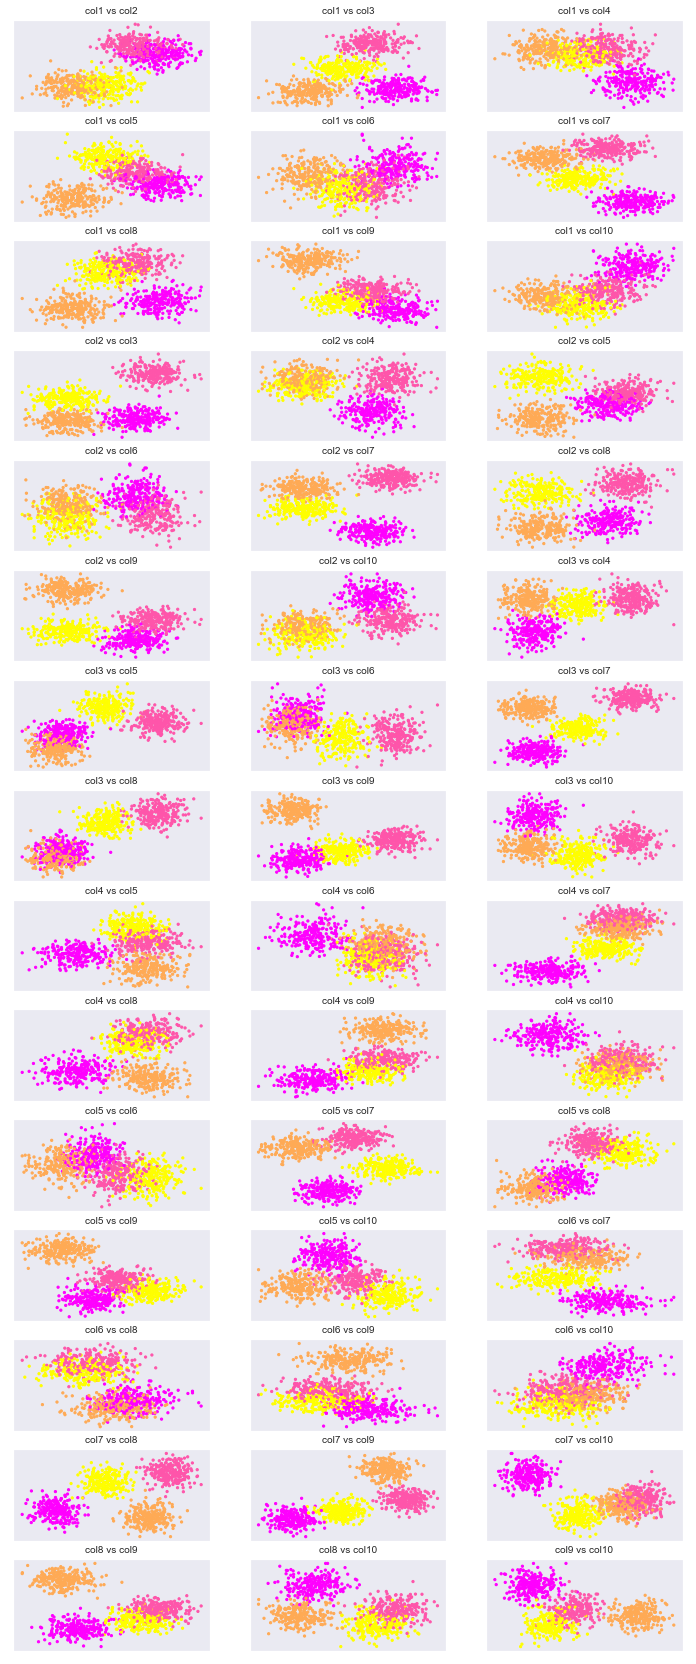

In [9]:
plt.figure(figsize=(12,30))

i = 1
for col_c in list(combinations(raw_df.drop(['Cluster'], axis=1).columns, 2)):
    
    col1 = col_c[0]
    col2 = col_c[1]
    
    plt.subplot(15, 3, i)
    plt.title(col1+' vs '+col2, fontsize=10)
    plt.xticks([])
    plt.yticks([])
    
    plt.scatter(raw_df[col1], 
                raw_df[col2],
                c=raw_df["Cluster"],
                cmap='spring',
                s=5
    );
    i = i +1

### Principal components

In [10]:
pca = PCA(n_components=4)

The simulated data is already centered and scales, so we can go ahead and fit PCA model. 

We will fit PCA model using fit_transform function to our data X1 and the result pc contains the principal components.

In [11]:
pc = pca.fit_transform(X1)

In [12]:
pc.shape

(1000, 4)

In [13]:
pc[:10]

array([[ -2.28770319,  -5.67048724,  12.19300003,   0.19734432],
       [ -0.19432995,  -3.1321861 ,  10.27703894,   0.68549358],
       [ -7.17132142,  -9.96304212,  -3.87599641,   0.61783852],
       [ -1.19691229,  -2.34353856,  13.53804881,   1.3342282 ],
       [ -9.5030607 , -11.42060022,  -8.24801123,   0.07706813],
       [-11.83306362, -12.47765443,  -4.38753575,  -1.31740356],
       [ -5.32278096,  16.46163618,  -0.23872908,  -1.49004135],
       [ -9.30791082,  12.00499665,  -0.93633421,   2.27744714],
       [ -9.91748045, -12.02856126,  -6.83766449,   2.2122066 ],
       [ 19.75255218,  -0.23165311,   0.78766963,   1.58863548]])

In [15]:
# make a pandas data frame with the principal components (PCs) and 
# the known cluster assignments.

pc_df = pd.DataFrame(data = pc , 
                     columns = ['PC1', 'PC2','PC3','PC4'])

pc_df['Cluster'] = Y1

print(pc_df.shape)

(1000, 5)


In [16]:
Y1.shape

(1000,)

In [17]:
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-2.287703,-5.670487,12.193000,0.197344,3
1,-0.194330,-3.132186,10.277039,0.685494,3
2,-7.171321,-9.963042,-3.875996,0.617839,1
3,-1.196912,-2.343539,13.538049,1.334228,3
4,-9.503061,-11.420600,-8.248011,0.077068,1


Let us examine the variance explained by each principal component. 

We can clearly see that the first 2 principal components explains over 70% of the variation in the data.

In [18]:
print("Explained Variance: ", pca.explained_variance_ratio_)

Explained Variance:  [0.40794474 0.35031668 0.14097316 0.01699981]


In [19]:
# Let us plot the variance explained by each principal component. 
df_var = pd.DataFrame({'variance': pca.explained_variance_ratio_,
                       'PC':['PC1','PC2','PC3','PC4']})
df_var

,variance,PC
0,0.407945,PC1
1,0.350317,PC2
2,0.140973,PC3
3,0.017000,PC4


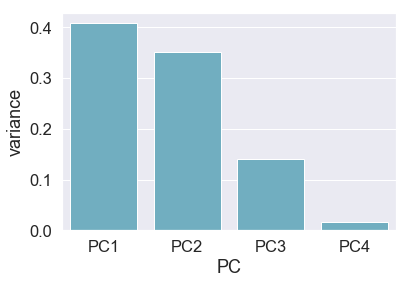

In [20]:
sns.barplot(x='PC',
            y="variance", 
            data=df_var, 
            color="c",
);

Now we can use the top two principal components and make scatter plot. 

We will use Seaborn’s lmplot to make the PCA plot using the fit_reg=False option and color clusters with ‘hue’.

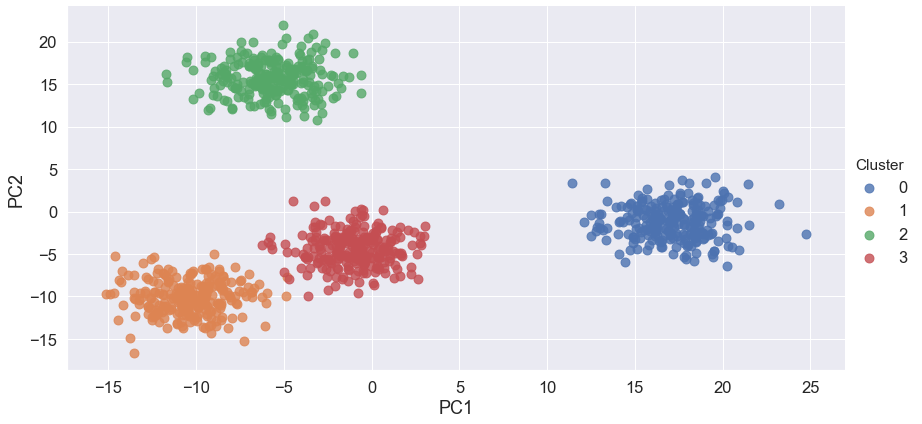

In [20]:
sns.lmplot(x="PC1", 
           y="PC2",
           data=pc_df, 
           fit_reg=False, 
           hue='Cluster', # color by cluster
           legend=True,
           scatter_kws={"s": 80},
           height=6,
           aspect=2);

We can clearly see the four clusters in our data. The two principal components are able to completely separate the clusters.

### PC1, PC2 & PC3 in 3D

<IPython.core.display.Javascript object>


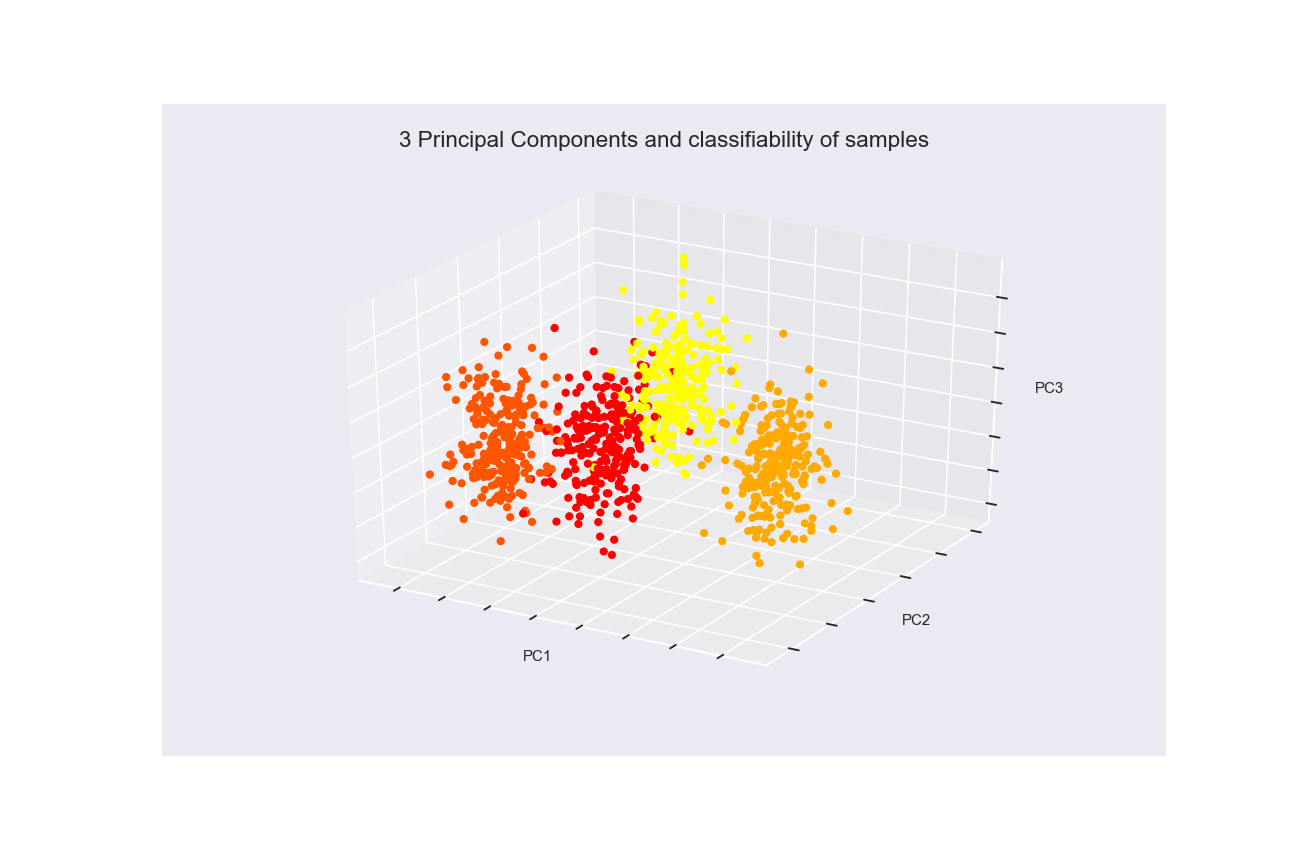

In [21]:
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter( pc_df['PC2'],
            pc_df['PC3'],
            pc_df['PC4'],
            c=pc_df['Cluster'], 
            marker='o', 
            alpha=1,
            cmap='autumn')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('PC1', fontsize=10)
ax.set_ylabel('PC2', fontsize=10)
ax.set_zlabel('PC3', fontsize=10)

ax.set_title('3 Principal Components and classifiability of samples', fontsize=15)

ax.dist = 12

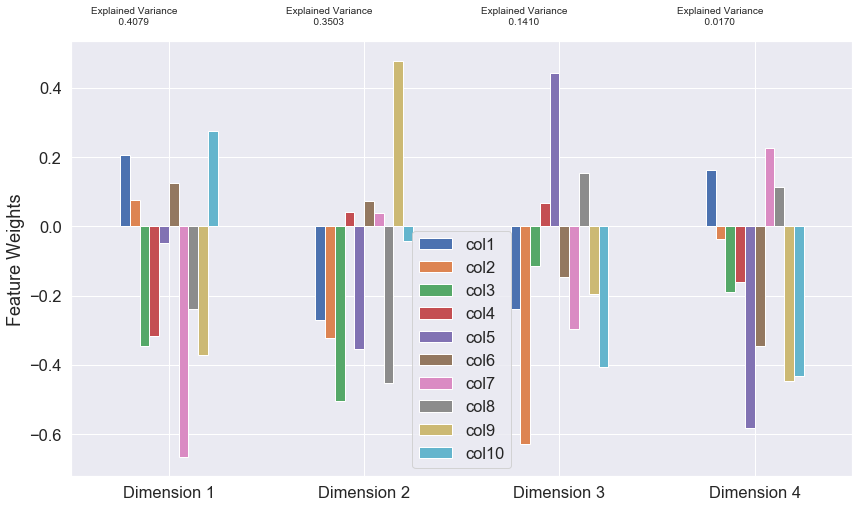

In [22]:
# Generate PCA results plot
%matplotlib inline
pca_results = pca_results(raw_df.drop(['Cluster'], axis=1), pca)

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. 

The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). 

In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.


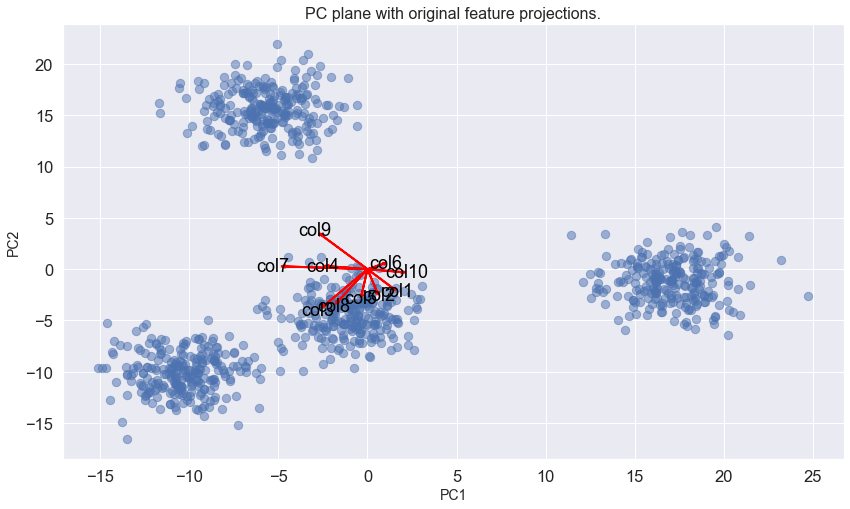

In [23]:
# Create a biplot
biplot(raw_df, pc_df, pca);

### biplot using using yellowbricks

In [24]:
from yellowbrick.features.pca import PCADecomposition

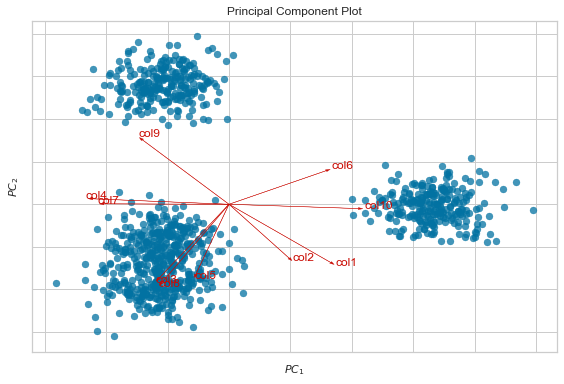

In [25]:
visualizer = PCADecomposition(scale=True, proj_features=True, color=None, colormap='spectral', proj_dim=3)

visualizer.fit_transform(raw_df.drop(['Cluster'], axis=1))

visualizer.poof()